In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:

# Simuloidut arvot Z-bosonin ja jettien hajoamisesta neljäksi leptoniksi.
dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])

# Simuloidut arvot huippukvarkin ja antihuippukvarkin hajoamiseen neljäksi leptoniksi.
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])

# Simuloidut arvot kahden Z-bosonin hajoamiseen neljäksi leptoniksi.
zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])

# Simuloidut arvot Higgsin bosonin hajoamiseen kahdeksi Z-bosoniksi, jotka hajoavat neljäksi leptoniksi.
# Oletuksena Higgsin massa 125 GeV.
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])

In [4]:
csvs = [pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/4mu_2011.csv'),
        pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/4e_2011.csv'), 
        pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/2e2mu_2011.csv')]
csvs += [pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/4mu_2012.csv'),
         pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/4e_2012.csv'), 
         pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/2e2mu_2012.csv')]

fourlep = pd.concat(csvs)

In [5]:

rmin = 70
rmax = 181
nbins = 37

M_hist = np.histogram(fourlep['M'], bins = nbins, range = (rmin,rmax))
hist, bins = M_hist

width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

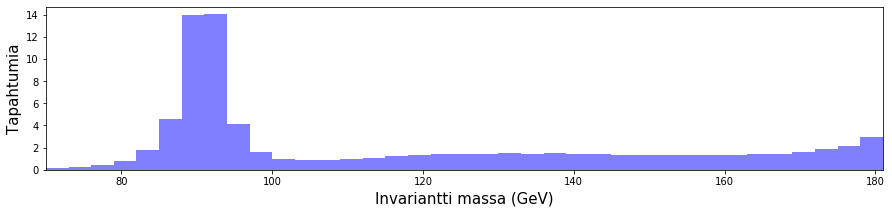

In [14]:
plt.figure(figsize = (15,3))
plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black', alpha = 0.5)
plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

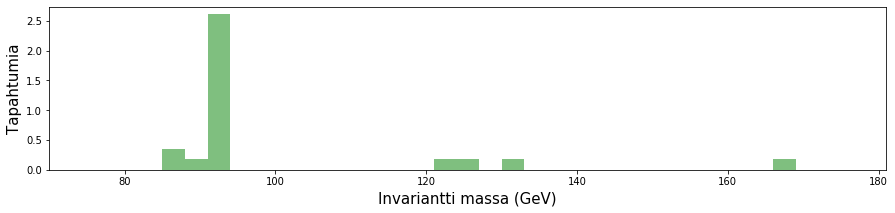

In [15]:
plt.figure(figsize = (15,3))
plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black', alpha = 0.5)
plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

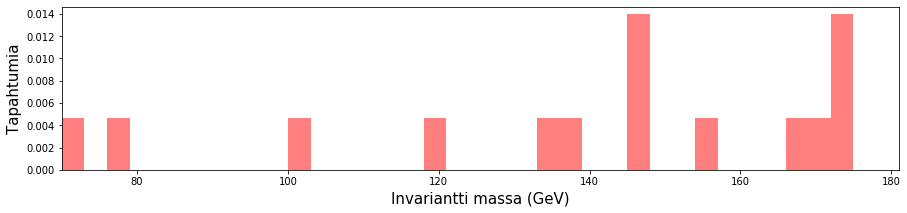

In [16]:
plt.figure(figsize = (15,3))
plt.bar(center, ttbar, align = 'center', width = width, color = 'r', linewidth = 0, edgecolor = 'black', alpha = 0.5)
plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

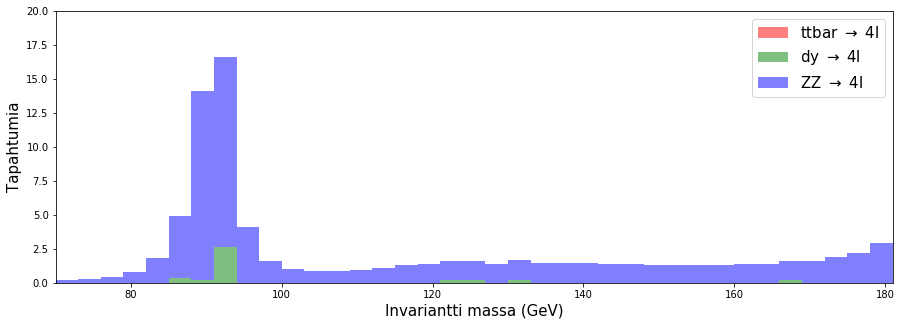

In [17]:
plt.figure(figsize = (15,5))

# ttbar
tt_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'r', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, label = r'ttbar $\rightarrow$ 4l')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = r'dy $\rightarrow$ 4l')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')


plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.ylim(0,20)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

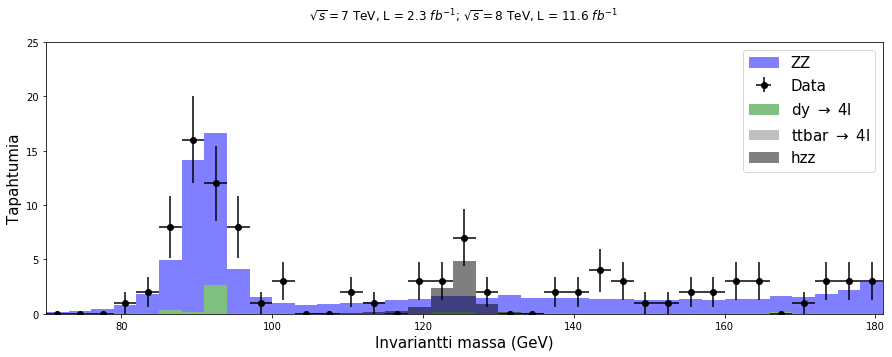

In [24]:
plt.figure(figsize = (15,5))

# Virherajat
xerrs = [width*0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ')

# Mittaukset.
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')
# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = r'dy $\rightarrow$ 4l')

# ttbar
tt_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'grey', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, label = r'ttbar $\rightarrow$ 4l')
# htt
hzz_bar = plt.bar(center, hzz, align = 'center', width = width, color = 'black', linewidth = 0, edgecolor = 'black', 
                  alpha = 0.5, label = r'hzz')
plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('Invariantti massa (GeV)', fontsize = 15)
plt.ylabel('Tapahtumia', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()